In [2]:
#Get the iWidget stuff
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import sys

sys.path.append('/home/michael/jupyter/local-packages')

# Get my Utilities (localUtilities)
from localUtilities import dateUtils, ibPyUtils, configIB 
from localUtilities.webScrape import getCompanEarningsFromYahoo

import numpy as np
import pandas as pd
import datetime
import random
import itertools
from IPython.display import display, HTML

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#interactive Shell to see variables outside of print() function - 
#  if this is on one can suppress output by adding a ';' at the end of line 
# #   not 100% clear which variables this supresses 
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Doc is here: https://ib-insync.readthedocs.io/readme.html
from ib_insync import *
util.startLoop()

ib = IB()
# Connect to IB Gateway / Paper Trade 4002 
#            TWS        / Paper Trade 7495
ib.connect('127.0.0.1', configIB.IB_PAPER_TRADE_PORT, clientId=27)

<IB connected to 127.0.0.1:4002 clientId=27>

In [3]:
#See if connected 
ib.isConnected()

True

In [ ]:
#disconnect
ib.disconnect()

In [14]:

theStock = 'GILD'
contract = Stock(theStock, 'SMART', 'USD')

#get earnings from Yahoo
yahooEarningsDF = getCompanEarningsFromYahoo.getPastEarnings(theStock)
yahooEarningsDF


,Symbol,Earnings_Date,Company,EPS_Estimate,Reported_EPS,Surprise(%)
0,GILD,2019-05-02 20:00:00,Gilead Sciences Inc,1.61,1.76,+9.32
1,GILD,2019-02-04 21:00:00,Gilead Sciences Inc,1.7,1.44,-15.29
2,GILD,2018-10-25 20:00:00,Gilead Sciences Inc,1.63,1.84,+12.88
3,GILD,2018-07-25 20:00:00,Gilead Sciences Inc,1.56,1.91,+22.44
4,GILD,2018-05-01 20:00:00,Gilead Sciences Inc,1.67,1.48,-11.38
5,GILD,2018-02-06 21:00:00,Gilead Sciences Inc,1.67,1.78,+6.59
6,GILD,2017-10-26 20:00:00,Gilead Sciences Inc,2.13,2.27,+6.57
7,GILD,2017-07-26 20:00:00,Gilead Sciences Inc,2.15,2.56,+19.07
8,GILD,2017-05-02 20:00:00,Gilead Sciences Inc,2.28,2.23,-2.19
9,GILD,2017-02-07 21:00:00,Gilead Sciences Inc,2.61,2.7,+3.45


In [15]:

# # add daysAroundEarnings Days forward - this will be used to count back and plot time
# # durationString,The amount of time (or Valid Duration String units) to go back from the request's given end date and time.

# add X(daysPassEarnings) Days forward past earnings - this will be used to count back
daysPassEarnings = 60

# How far back from daysPassEarnings
durationStrDays = '90 D'
# Bar size
setBarSizeSetting = '1 day'

#create time series panda dataframes from IB
earningsPastStock = []
earningsPastImpVol=[]



for earnData in range(0, len(yahooEarningsDF)):
        earningsPastStock.append(util.df(ib.reqHistoricalData(contract, endDateTime=yahooEarningsDF['Earnings_Date'][earnData]
                                                              +datetime.timedelta(days=daysPassEarnings),  
                                                              durationStr=durationStrDays,barSizeSetting=setBarSizeSetting, 
                                                              whatToShow='TRADES', useRTH=True)))
        earningsPastImpVol.append(util.df(ib.reqHistoricalData(contract, endDateTime=yahooEarningsDF['Earnings_Date'][earnData]
                                                               +datetime.timedelta(days=daysPassEarnings), 
                                                               durationStr=durationStrDays,barSizeSetting=setBarSizeSetting, 
                                                               whatToShow='OPTION_IMPLIED_VOLATILITY', useRTH=True)))
        
# earningsPastStock
# earningsPastImpVol

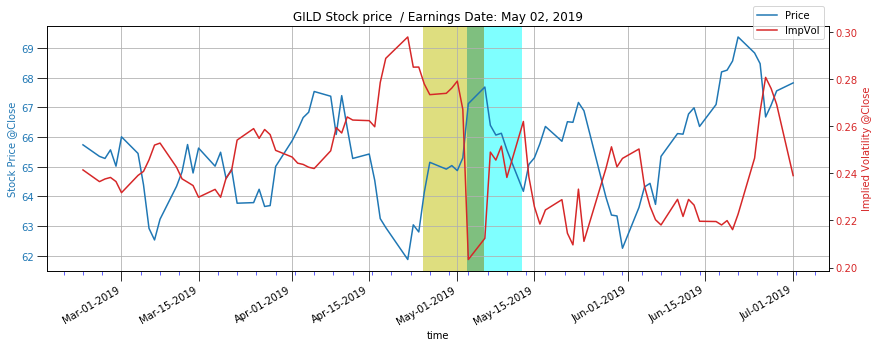

Earning Price Max:   2.39
Earning Price Min:   -3.43
Earning Price Max % Delta:   3.53
Earning Price Min % Delta:   -5.54


Earning ImpVol Max:   0.03
Earning ImpVol Min:   -0.06
Earning ImpVol Max % Delta:   10.0
Earning ImpVol Min % Delta:   -31.0


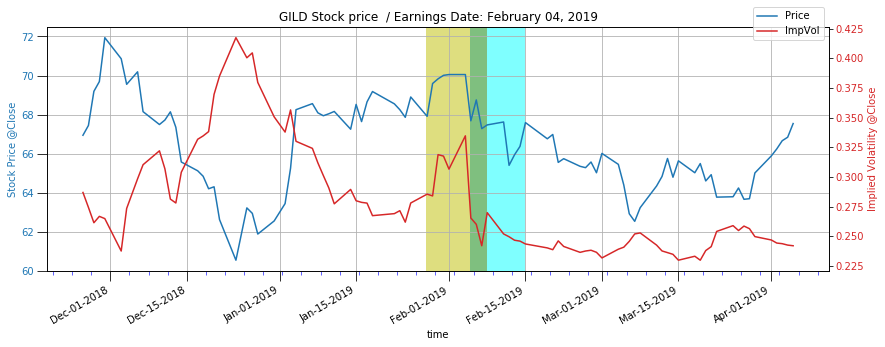

Earning Price Max:   0.0
Earning Price Min:   -4.65
Earning Price Max % Delta:   0.0
Earning Price Min % Delta:   -7.11


Earning ImpVol Max:   0.0
Earning ImpVol Min:   -0.09
Earning ImpVol Max % Delta:   0.0
Earning ImpVol Min % Delta:   -39.0


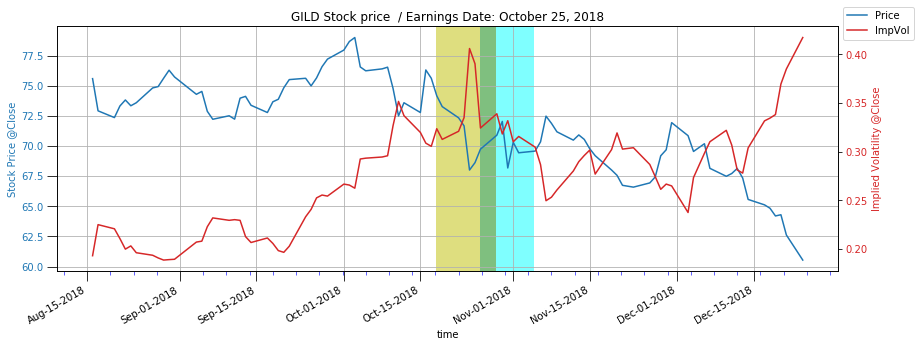

Earning Price Max:   7.69
Earning Price Min:   -0.61
Earning Price Max % Delta:   10.08
Earning Price Min % Delta:   -0.9


Earning ImpVol Max:   0.02
Earning ImpVol Min:   -0.14
Earning ImpVol Max % Delta:   4.0
Earning ImpVol Min % Delta:   -56.0


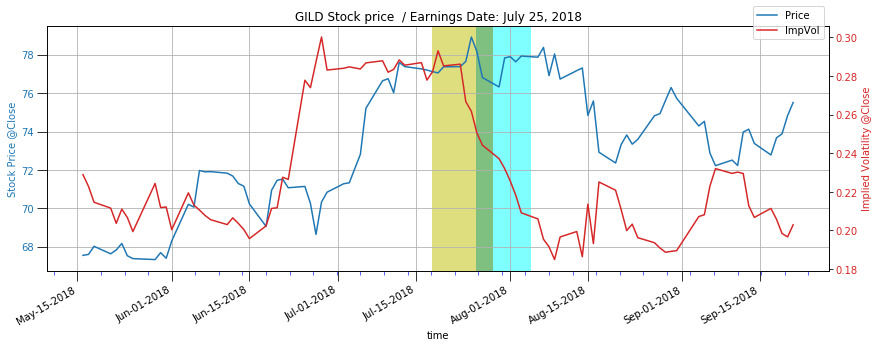

Earning Price Max:   0.0
Earning Price Min:   -2.9
Earning Price Max % Delta:   0.0
Earning Price Min % Delta:   -3.81


Earning ImpVol Max:   0.03
Earning ImpVol Min:   -0.08
Earning ImpVol Max % Delta:   11.0
Earning ImpVol Min % Delta:   -42.0


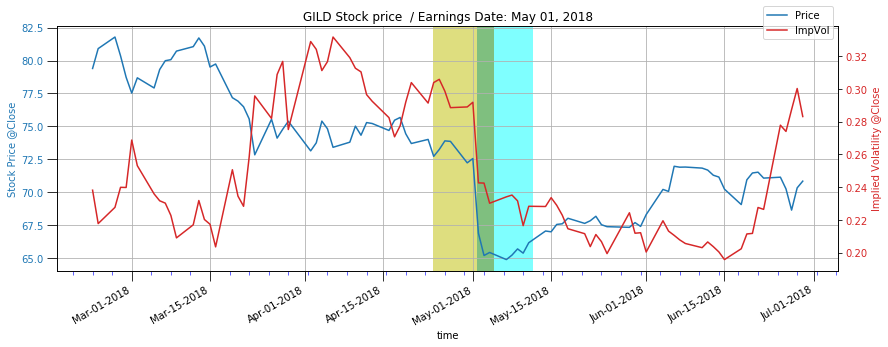

Earning Price Max:   3.12
Earning Price Min:   -7.68
Earning Price Max % Delta:   4.12
Earning Price Min % Delta:   -11.84


Earning ImpVol Max:   0.01
Earning ImpVol Min:   -0.08
Earning ImpVol Max % Delta:   5.0
Earning ImpVol Min % Delta:   -35.0


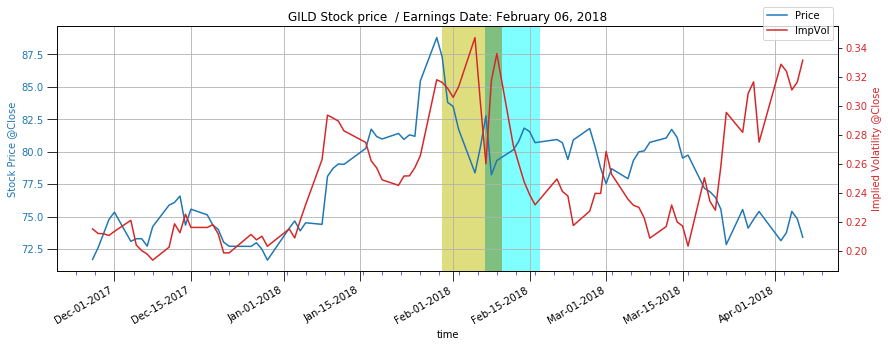

Earning Price Max:   8.42
Earning Price Min:   -2.16
Earning Price Max % Delta:   9.48
Earning Price Min % Delta:   -2.76


Earning ImpVol Max:   0.05
Earning ImpVol Min:   -0.07
Earning ImpVol Max % Delta:   13.0
Earning ImpVol Min % Delta:   -30.0


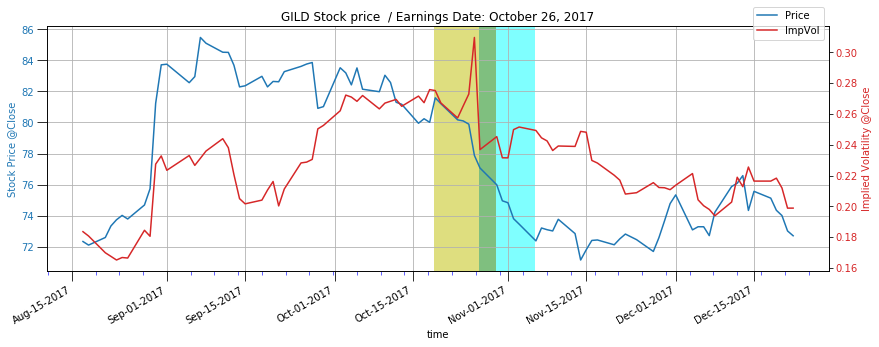

Earning Price Max:   4.69
Earning Price Min:   -5.5
Earning Price Max % Delta:   5.68
Earning Price Min % Delta:   -7.6


Earning ImpVol Max:   0.0
Earning ImpVol Min:   -0.08
Earning ImpVol Max % Delta:   0.0
Earning ImpVol Min % Delta:   -34.0


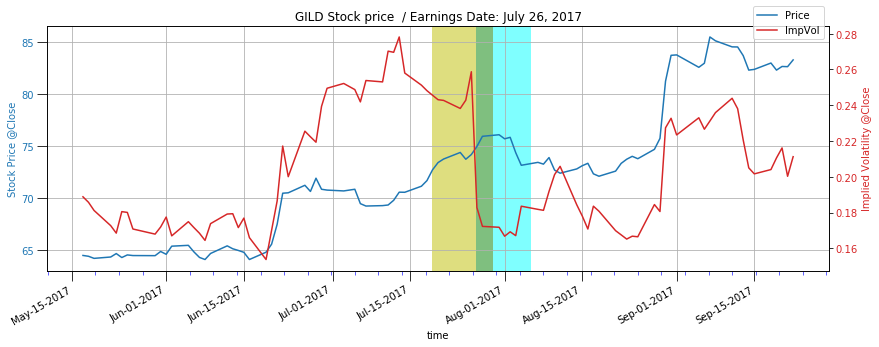

Earning Price Max:   1.9
Earning Price Min:   -4.84
Earning Price Max % Delta:   2.5
Earning Price Min % Delta:   -6.98


Earning ImpVol Max:   0.02
Earning ImpVol Min:   -0.09
Earning ImpVol Max % Delta:   7.0
Earning ImpVol Min % Delta:   -55.0


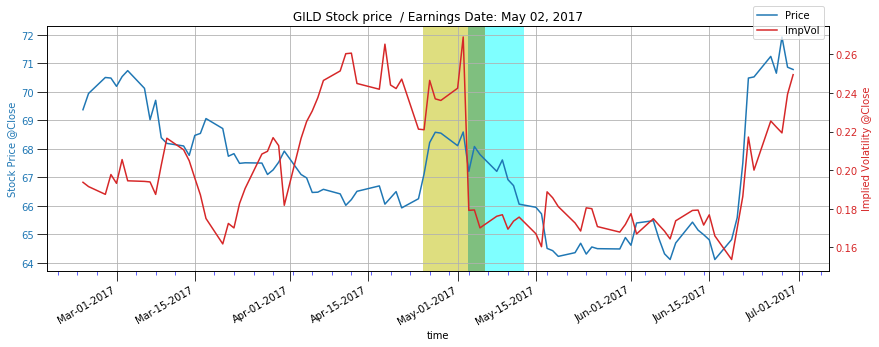

Earning Price Max:   0.0
Earning Price Min:   -4.08
Earning Price Max % Delta:   0.0
Earning Price Min % Delta:   -6.32


Earning ImpVol Max:   -0.0
Earning ImpVol Min:   -0.11
Earning ImpVol Max % Delta:   0.0
Earning ImpVol Min % Delta:   -68.0


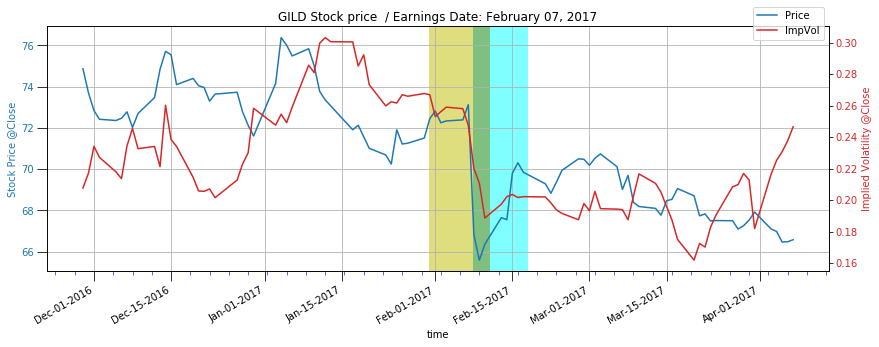

Earning Price Max:   0.0
Earning Price Min:   -7.54
Earning Price Max % Delta:   0.0
Earning Price Min % Delta:   -11.5


Earning ImpVol Max:   0.02
Earning ImpVol Min:   -0.06
Earning ImpVol Max % Delta:   8.0
Earning ImpVol Min % Delta:   -31.0


In [16]:
colorStock = 'tab:blue'
colorImpVol = 'tab:red'
xLabel = 'time'
yLabelStock = 'Stock Price @Close';
yLabelImpVol = 'Implied Volatility @Close';
ax1LegendLabel = "Price"
ax2LegendLabel = "ImpVol"

locator = mdates.AutoDateLocator(minticks=5, maxticks=15)
formatter = mdates.ConciseDateFormatter(locator)
myFmt = DateFormatter("%b-%d-%Y")


for earn in range(0, len(earningsPastImpVol)): # for all the dates in earningsCalendar
    fig, ax1 = plt.subplots(figsize=(14,5)); # single Plot

    earningDateString = yahooEarningsDF['Earnings_Date'][earn].strftime("%B %d, %Y")
    theTitle = theStock + " Stock price "+ " / Earnings Date: " + earningDateString
    impVolDataHeaderStockString = '<hr> <strong><span style="color: #ff0000; font-family: arial, helvetica, sans-serif; font-size: large;"> ' + theStock 

    dataHeaderEarningDateString = '<br></span></strong><span style="font-size: small; color: #008000;"><strong><span style="font-family: arial, helvetica, sans-serif;">Earning Date &#9884 ' \
    + earningDateString + '<hr> '
    
    impVolDataHeader = impVolDataHeaderStockString  + ' &#9830; ImpVol ' + dataHeaderEarningDateString
    
    priceHeaderDataHeaderStockString = '<hr> <strong><span style="color: blue; font-family: arial, helvetica, sans-serif; font-size: large;"> ' + theStock 

    priceHeader = priceHeaderDataHeaderStockString  + ' &#9830; Price ' + dataHeaderEarningDateString

    
    
    ax1.set_title(theTitle);

    ax1.set_xlabel(xLabel);
    ax1.set_ylabel(yLabelStock, color=colorStock);
    ax1.plot(earningsPastStock[earn]['date'], earningsPastStock[earn]['close'], color=colorStock, label=ax1LegendLabel);
    ax1.tick_params(axis='y', labelcolor=colorStock);
    ax1.grid(True);

    # instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx();
    ax2.set_ylabel(yLabelImpVol, color=colorImpVol)  # we already handled the x-label with ax1
    ax2.plot(earningsPastImpVol[earn]['date'] ,earningsPastImpVol[earn]['close'], color=colorImpVol, label=ax2LegendLabel)
    ax2.tick_params(axis='y', labelcolor=colorImpVol)

    #build Legend for 2 Xaxis
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1.0, 1.1))

    #set up Major/Minor xAxis 
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(formatter)

    # Format xAxis Date
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.tick_params(which='major', length=10)
    ax1.tick_params(which='minor', length=4, color='b')
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    
    ax1.axvspan(mdates.date2num(yahooEarningsDF['Earnings_Date'][earn]),
                mdates.date2num(yahooEarningsDF['Earnings_Date'][earn]+datetime.timedelta(days=3)),
                facecolor='g', alpha=0.5)
    ax1.axvspan(mdates.date2num(yahooEarningsDF['Earnings_Date'][earn]),
                mdates.date2num(yahooEarningsDF['Earnings_Date'][earn]-datetime.timedelta(days=8)),
                facecolor='y', alpha=0.5)
    ax1.axvspan(mdates.date2num(yahooEarningsDF['Earnings_Date'][earn]+datetime.timedelta(days=3)),
                mdates.date2num(yahooEarningsDF['Earnings_Date'][earn]+datetime.timedelta(days=10)),
                facecolor='aqua', alpha=0.5)

    fig.autofmt_xdate()
    plt.show()
    
    #=========================================================================================================
#     #get earning date
#     print(earningsCalendar.loc[:,:])
#     print(earningsCalendar.EarningDateTime[earn])

    # recreate index as the 'date' column 
    ePS2 = earningsPastStock[earn].set_index("date", drop=False)
    ePS2.index = pd.to_datetime(ePS2.index)

    onEarningDate = yahooEarningsDF['Earnings_Date'][earn].date()
    onEarningDatePast = onEarningDate - datetime.timedelta(days=15)
    onEarningDateForward = onEarningDate + datetime.timedelta(days=15)

    # Create new dataframe from old // old[['A', 'C', 'D']].copy()
    # Create a new df and set index to date
    onEarningDatePastdf=(ePS2.loc[onEarningDatePast:onEarningDateForward,['date','close']].copy()).set_index("date", drop=False)

    # Let’s add a new column ‘Percentage’ where entry at each index will be calculated by the values in other columns at that index i.e.
    # dfObj['Percentage'] =  (dfObj['Marks'] / dfObj['Total'] ) * 100
    x=yahooEarningsDF['Earnings_Date'][earn].date()
    onEarningDatePastdf['earningDayPriceDelta'] = round((onEarningDatePastdf['close'] - ePS2.close.at[x]),2)
    onEarningDatePastdf['earningDayPercentDelta'] = round(100-((ePS2.close.at[x]/onEarningDatePastdf['close'])*100),2)

    display(HTML(priceHeader))
    print('Earning Price Max:  ', onEarningDatePastdf.earningDayPriceDelta.max())
    print('Earning Price Min:  ', onEarningDatePastdf.earningDayPriceDelta.min())
    print('Earning Price Max % Delta:  ', onEarningDatePastdf.earningDayPercentDelta.max())
    print('Earning Price Min % Delta:  ', onEarningDatePastdf.earningDayPercentDelta.min())
#     display(onEarningDatePastdf)

    #-----------------------------------
    # recreate index as the 'date' column 
    ePIV2 = earningsPastImpVol[earn].set_index("date", drop=False)
    ePIV2.index = pd.to_datetime(ePIV2.index)

    # Create new dataframe from old // old[['A', 'C', 'D']].copy()
    # Create a new df and set index to date
    onEarningDatePastIVdf=(ePIV2.loc[onEarningDatePast:onEarningDateForward,['date','close']].copy()).set_index("date", drop=False)
    
    display(HTML(impVolDataHeader))
    
    onEarningDatePastIVdf['earningDayIVPriceDelta'] = round(onEarningDatePastIVdf['close'] - ePIV2.close.at[x],2)
    onEarningDatePastIVdf['earningDayIVPercentDelta'] = round(100-round(((ePIV2.close.at[x]/onEarningDatePastIVdf['close'])*100),2))
    print('Earning ImpVol Max:  ', onEarningDatePastIVdf.earningDayIVPriceDelta.max())
    print('Earning ImpVol Min:  ', onEarningDatePastIVdf.earningDayIVPriceDelta.min())
    print('Earning ImpVol Max % Delta:  ', onEarningDatePastIVdf.earningDayIVPercentDelta.max())
    print('Earning ImpVol Min % Delta:  ', onEarningDatePastIVdf.earningDayIVPercentDelta.min())
#     display(onEarningDatePastIVdf)

